### Load Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

### Prepare data

In [2]:
iris=load_iris()

In [5]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [6]:
df.corr()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
target                      0.782561         -0.426658           0.949035   

                   petal width (cm)    target  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
target                     0.956547  1.000000

In [7]:
X = iris.data[:100,2:]
Y = iris.target[:100]

In [8]:
print(X.shape)
print(Y.shape)

(100, 2)
(100,)


In [9]:
pd.Series(Y).value_counts()

1    50
0    50
dtype: int64

### Data Visualization

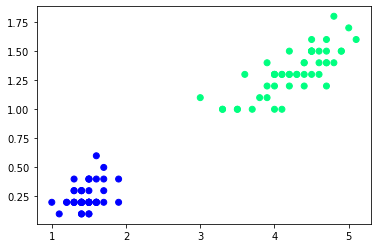

In [10]:
plt.scatter(X[:,0],X[:,1],c=Y, cmap="winter")

### Classification using Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
log = LogisticRegression()
log.fit(X,Y)

LogisticRegression()

In [15]:
log.coef_[0]

array([2.58260918, 1.06908093])

In [16]:
w = log.coef_[0]
a = -w[0]/w[1]
x1 = np.linspace(1,5,50)
x2 = a*x1+ (-log.intercept_[0]/w[1])

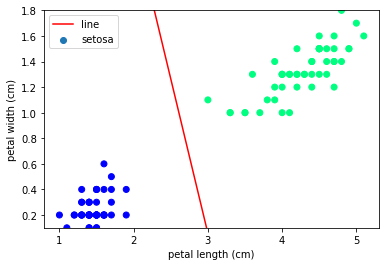

In [18]:
plt.plot(x1,x2,c="red")
plt.scatter(X[:,0],X[:,1],c=Y, cmap="winter")
plt.ylim([0.1,1.8])
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.legend(["line","setosa","versicolor"])
plt.show()

### Evaluation

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
log.score(X,Y)

1.0

In [21]:
pred = log.predict(X)
accuracy_score(Y, pred)

1.0

### Let's implement sigmoid function

<img src='log2.png'>

In [22]:
c=log.intercept_[0]
c

-7.808285629051855

In [24]:
m = log.coef_
m

array([[2.58260918, 1.06908093]])

In [32]:
X[99]

array([4.1, 1.3])

In [33]:
X[99].shape

(2,)

In [28]:
# np.array([10,20])*np.array([1,2])

In [34]:
# y=mx+c
yp= np.dot(m,X[99])+c
yp

array([4.17021723])

In [35]:
#Sigmoid function
1/(1+np.exp(-yp))

## Probability 0.01 means it belongs to class 0
## Probability 0.99 means it belongs to class 1

array([0.98478613])

In [36]:
Y[99]

1